# Chong Zhen Jie A0201613Y
---
# Assignment Question 3: Compressed Sensing

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
sns.set_theme(style="ticks", font_scale=1.5)
SEED = 5232

### 3(i) Generating random matrix $A\in\mathbb{R}^{m\times n}$ and random sparse vector $x^*\in\mathbb{R}^n$

In [3]:
n = 50

# Range of values for m and s
idx = range(1,51)

# Define function to create sparse vector
def create_sx(s, n=n):
    """
    Args:
    ===
    s: Sparsity, or number of non-zero entries
    n: Size of sparse vector
    
    Output:
    ===
    Return a sparse vector of size n, with sparsity s.
    """
    # Percent of non-zero entries
    percent = (s / n) * 100
    
    # Create Boolean mask
    rand = np.random.rand(n)
    mask = rand <= np.percentile(rand, percent)
    
    # Initialize zero vector
    sx = np.zeros(n)
    
    # Fill in entries based on index randomly generated
    sx[mask] = 1
    
    return sx

In [4]:
# Random matrix A
np.random.standard_normal(size=(idx[-1],n)).shape

(50, 50)

In [5]:
# Random sparse vector
create_sx(idx[2])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 3(iii) Defining error tolerance

In [6]:
# Define function to check for success
def success(sx, soln, TOL=1e-4):
    """
    Args:
    ===
    sx: Sparse vector
    soln: Optimal solution x
    TOL: Tolerance level
    
    Output:
    ===
    Return True if relative error is within tolerance level, otherwise return False.
    """
    # Relative error under L2-norm
    err = np.linalg.norm(soln-sx) / np.linalg.norm(sx)
    
    return err <= TOL

### 3(iv) Solving the problem

##### Run solver

In [7]:
# Define function for solver
def solver(A, y):
    """
    Args:
    ===
    A: Random matrix A
    y: Matrix multiplication of random matrix A and sparse vector sx
    
    Output:
    ===
    Return optimal solution x.
    """
    # Construct problem and run solver
    x = cp.Variable(shape=n)
    objective = cp.Minimize(cp.norm(x,1))
    constraints = [y == A@x]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    # Retrieve optimal solution x
    soln = x.value
    
    return soln

In [8]:
# Define function to run solver for all values of m and s
def run_solver(solver=solver, create_sx=create_sx, n=n, niter=10, idx=idx):
    """
    Args:
    ===
    solver: Function for solver
    create_sx: Function to create sparse vector
    n: Fixed parameter
    niter: Number of iterations for each pair of m and s
    idx: Range of values for m and s
    
    Output:
    ===
    Return matrix recording the successes for each pair of m and s.
    """
    # Initialize matrix to record success for each pair of m and s
    success_mat = np.zeros(shape=(n,n))
    
    for m in tqdm(idx, desc="Progress bar"):
        for s in idx:
            for _ in range(niter):
                # Initialize parameters for solver
                sx = create_sx(s)
                A = np.random.standard_normal(size=(m,n))
                y = A @ sx
                
                # Run solver
                soln = solver(A,y)
                
                # Record success
                success_mat[m-1, s-1] += success(sx, soln)
                
    return success_mat

In [9]:
###############################
### Around 3 minutes to run ###
###############################

# Run solver for all values of m and s
np.random.seed(SEED)
success_mat = run_solver()

Progress bar: 100%|████████████████████████████████████████████████████████████████████| 50/50 [02:55<00:00,  3.51s/it]


##### Results

In [10]:
# Average across all pairs of m and s
avg_success = np.mean(success_mat)

print(f"Across all pairs of m and s, we have an average of {avg_success} successes out of the 10 trials.")

Across all pairs of m and s, we have an average of 2.726 successes out of the 10 trials.


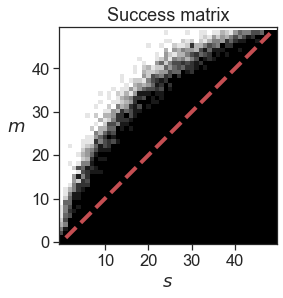

In [11]:
# Plot grayscale image of success matrix
plt.imshow(success_mat, cmap="gray", origin="lower")
# Plot 45-degree reference line
plt.plot([1,n-2], [1,n-2], ls="--", c="r", lw=4)

plt.xlabel("$s$")
plt.xticks([i*10 for i in range(1,5)])
plt.ylabel("$m$", rotation="horizontal", labelpad=15)
plt.title("Success matrix")

plt.show()

---